#Bioinformatics Assignment 5
Bedtools table

In [304]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [305]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [306]:
# load data

# Bedtools outputs
bed_df_A = pd.read_csv('https://raw.githubusercontent.com/bmurphy1993/NYU_bioinformatics-assn_5/main/bed_tools_10462813.txt',
                     sep='\t',
                     header=None)
bed_df_A.columns = ['chr_ref', 'start_ref', 'end_ref', 'group', 'chr', 'start', 'end','overlap1', 'overlap2']

bed_df_B = pd.read_csv('https://raw.githubusercontent.com/bmurphy1993/NYU_bioinformatics-assn_5/main/bed_tools_B_10463170.txt',
                     sep='\t',
                     header=None)
bed_df_B.columns = ['chr_ref', 'start_ref', 'end_ref', 'group', 'chr', 'start', 'end','overlap1', 'overlap2']

# A and B compartments
df_A = pd.read_csv('https://raw.githubusercontent.com/bmurphy1993/NYU_bioinformatics-assn_5/main/A_compartments.txt',
                   sep='\t',
                   header=None)
df_A.columns = ['chr_ref', 'start', 'end']

df_B = pd.read_csv('https://raw.githubusercontent.com/bmurphy1993/NYU_bioinformatics-assn_5/main/B_compartments.txt',
                   sep='\t',
                   header=None)
df_B.columns = ['chr_ref', 'start', 'end']

In [307]:
# fix overlap columns

# A
overlap = [None]*len(bed_df_A)
for i in bed_df_A.index:
  if bed_df_A['overlap2'][i] == 1.0:
    overlap[i] = bed_df_A['overlap2'][i]
  else:
    overlap[i] = bed_df_A['overlap1'][i]
bed_A = bed_df_A
bed_A['overlap_bp_A'] = overlap
bed_A = bed_df_A.drop(['start_ref', 'end_ref', 'chr', 'start', 'end', 'overlap1', 'overlap2'], axis=1)
bed_A['overlap_bp_A'] = bed_A['overlap_bp_A'].astype('float')

# B
overlap = [None]*len(bed_df_B)
for i in bed_df_B.index:
  if bed_df_B['overlap2'][i] == 1.0:
    overlap[i] = bed_df_B['overlap2'][i]
  else:
    overlap[i] = bed_df_B['overlap1'][i]
bed_B = bed_df_B
bed_B['overlap_bp_B'] = overlap
bed_B = bed_df_B.drop(['start_ref', 'end_ref', 'chr', 'start', 'end', 'overlap1', 'overlap2'], axis=1)
bed_B['overlap_bp_B'] = bed_B['overlap_bp_B'].astype('float')

In [308]:
# Sum overlaps by chromosome and group
overlaps_A = bed_A.groupby(['chr_ref', 'group']).sum().reset_index()
overlaps_B = bed_B.groupby(['chr_ref', 'group']).sum().reset_index()

overlaps_df = overlaps_A.merge(overlaps_B, left_on=['chr_ref', 'group'], right_on=['chr_ref', 'group'])

overlaps_total = overlaps_df.groupby(['group']).sum().reset_index()

overlaps_df['AtoB_bp'] = overlaps_df['overlap_bp_A'] / overlaps_df['overlap_bp_B'] 
overlaps_total['AtoB_bp'] = overlaps_total['overlap_bp_A'] / overlaps_total['overlap_bp_B']

print(overlaps_df.head(), '\n')
print(overlaps_total)

  chr_ref    group  overlap_bp_A  overlap_bp_B    AtoB_bp
0    chr1  H3K27ac     4573905.0      406225.0  11.259536
1    chr1       HK     8206025.0      284649.0  28.828575
2    chr1      TSS        1380.0         510.0   2.705882
3   chr10  H3K27ac     3581014.0      322280.0  11.111499
4   chr10       HK     5131327.0      294247.0  17.438842 

     group  overlap_bp_A  overlap_bp_B    AtoB_bp
0  H3K27ac    70914563.0     6698507.0  10.586622
1       HK   123500371.0     9720014.0  12.705781
2      TSS       25081.0       11425.0   2.195274


In [309]:
# number of peaks
peaks_chr_A = bed_A.groupby(['chr_ref', 'group']).size().reset_index(name='n_peaks_A')
peaks_tot_A = bed_A.groupby(['group']).size().reset_index(name='n_peaks_A')

peaks_chr_B = bed_B.groupby(['chr_ref', 'group']).size().reset_index(name='n_peaks_B')
peaks_tot_B = bed_B.groupby(['group']).size().reset_index(name='n_peaks_B')

overlaps_chr = overlaps_df.merge(peaks_chr_A, left_on=['chr_ref', 'group'], right_on=['chr_ref', 'group'])
overlaps_chr = overlaps_chr.merge(peaks_chr_B, left_on=['chr_ref', 'group'], right_on=['chr_ref', 'group'])
overlaps_chr['AtoB_npeaks'] = overlaps_chr['n_peaks_A'] / overlaps_chr['n_peaks_B'] 

overlaps_group = overlaps_total.merge(peaks_tot_A, left_on=['group'], right_on=['group'])
overlaps_group = overlaps_group.merge(peaks_tot_B, left_on=['group'], right_on=['group'])
overlaps_group['AtoB_npeaks'] = overlaps_group['n_peaks_A'] / overlaps_group['n_peaks_B'] 

print(overlaps_chr.head(), '\n')
print(overlaps_group)

  chr_ref    group  overlap_bp_A  ...  n_peaks_A  n_peaks_B  AtoB_npeaks
0    chr1  H3K27ac     4573905.0  ...       1610        201     8.009950
1    chr1       HK     8206025.0  ...        174          9    19.333333
2    chr1      TSS        1380.0  ...       1380        510     2.705882
3   chr10  H3K27ac     3581014.0  ...       1314        164     8.012195
4   chr10       HK     5131327.0  ...        144          8    18.000000

[5 rows x 8 columns] 

     group  overlap_bp_A  overlap_bp_B  ...  n_peaks_A  n_peaks_B  AtoB_npeaks
0  H3K27ac    70914563.0     6698507.0  ...      25669       3202     8.016552
1       HK   123500371.0     9720014.0  ...       3097        238    13.012605
2      TSS       25081.0       11425.0  ...      25081      11425     2.195274

[3 rows x 7 columns]


In [310]:
# A and B total length
df_A['bp'] = (df_A['end'] - df_A['start']) / 1000000
A_tot = df_A.drop(['chr_ref','start', 'end'], axis=1).sum().reset_index().drop('index', axis=1)
overlaps_group['A_length'] = [A_tot.loc[0,0]]*len(overlaps_group)

df_B['bp'] = (df_B['end'] - df_B['start']) / 1000000
B_tot = df_B.drop(['chr_ref','start', 'end'], axis=1).sum().reset_index().drop('index', axis=1)
overlaps_group['B_length'] = [B_tot.loc[0,0]]*len(overlaps_group)

overlaps_group['peaks_A_norm'] = overlaps_group['n_peaks_A'] / overlaps_group['A_length']
overlaps_group['peaks_B_norm'] = overlaps_group['n_peaks_B'] / overlaps_group['B_length']

overlaps_group['AtoB_norm'] = overlaps_group['peaks_A_norm'] / overlaps_group['peaks_B_norm']

overlaps_group

,group,overlap_bp_A,overlap_bp_B,AtoB_bp,n_peaks_A,n_peaks_B,AtoB_npeaks,A_length,B_length,peaks_A_norm,peaks_B_norm,AtoB_norm
0,H3K27ac,70914563.0,6698507.0,10.586622,25669,3202,8.016552,1232.6,1334.5,20.825085,2.399401,8.679287
1,HK,123500371.0,9720014.0,12.705781,3097,238,13.012605,1232.6,1334.5,2.512575,0.178344,14.088367
2,TSS,25081.0,11425.0,2.195274,25081,11425,2.195274,1232.6,1334.5,20.348045,8.561259,2.376758


In [311]:
# A and B length per chromosome
A_chr = df_A.drop(['start', 'end'], axis=1).groupby(['chr_ref']).sum().reset_index()
A_chr = A_chr.rename(columns={'bp':'A_length'})
overlaps_chr = overlaps_chr.merge(A_chr,left_on='chr_ref', right_on='chr_ref')

B_chr = df_B.drop(['start', 'end'], axis=1).groupby(['chr_ref']).sum().reset_index()
B_chr = B_chr.rename(columns={'bp':'B_length'})
overlaps_chr = overlaps_chr.merge(B_chr,left_on='chr_ref', right_on='chr_ref')

overlaps_chr['peaks_A_norm'] = overlaps_chr['n_peaks_A'] / overlaps_chr['A_length']
overlaps_chr['peaks_B_norm'] = overlaps_chr['n_peaks_B'] / overlaps_chr['B_length']

overlaps_chr['AtoB_norm'] = overlaps_chr['peaks_A_norm'] / overlaps_chr['peaks_B_norm']

chrmap = {'chr_ref': ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chrX','chrY'],
          'chr_val': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]}
chrmap_df = pd.DataFrame(data=chrmap)

overlaps_chr = overlaps_chr.merge(chrmap_df, left_on='chr_ref', right_on='chr_ref') 
overlaps_chr = overlaps_chr.drop(overlaps_chr[overlaps_chr['chr_val'] > 19].index, axis=0)
overlaps_chr

,chr_ref,group,overlap_bp_A,overlap_bp_B,AtoB_bp,n_peaks_A,n_peaks_B,AtoB_npeaks,A_length,B_length,peaks_A_norm,peaks_B_norm,AtoB_norm,chr_val
0,chr1,H3K27ac,4573905.0,406225.0,11.259536,1610,201,8.009950,90.3,102.1,17.829457,1.968658,9.056655,1
1,chr1,HK,8206025.0,284649.0,28.828575,174,9,19.333333,90.3,102.1,1.926910,0.088149,21.859727,1
2,chr1,TSS,1380.0,510.0,2.705882,1380,510,2.705882,90.3,102.1,15.282392,4.995103,3.059475,1
3,chr10,H3K27ac,3581014.0,322280.0,11.111499,1314,164,8.012195,61.7,65.8,21.296596,2.492401,8.544610,10
4,chr10,HK,5131327.0,294247.0,17.438842,144,8,18.000000,61.7,65.8,2.333874,0.121581,19.196110,10
5,chr10,TSS,1091.0,365.0,2.989041,1091,365,2.989041,61.7,65.8,17.682334,5.547112,3.187665,10
6,chr11,H3K27ac,5828602.0,694766.0,8.389302,2011,289,6.958478,61.9,56.9,32.487884,5.079086,6.396403,11
7,chr11,HK,8972292.0,627604.0,14.296104,265,28,9.464286,61.9,56.9,4.281099,0.492091,8.699804,11
8,chr11,TSS,2211.0,708.0,3.122881,2211,708,3.122881,61.9,56.9,35.718901,12.442882,2.870629,11
9,chr12,H3K27ac,2652695.0,193907.0,13.680244,1002,103,9.728155,57.6,59.5,17.395833,1.731092,10.049049,12


Text(0.5, 1.0, 'Compartment A to B Ratio by Chromosome')

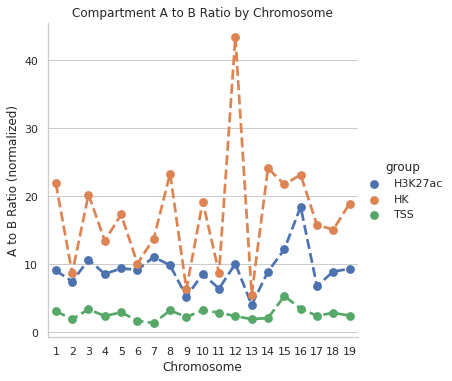

In [312]:
sns.set_style('whitegrid')
g = sns.catplot(data=overlaps_chr, x='chr_val', y='AtoB_norm',
                hue='group',
                kind='point',
                linestyles=['--', '--', '--']
                )

g.set_xlabels('Chromosome')
g.set_ylabels('A to B Ratio (normalized)')
plt.title('Compartment A to B Ratio by Chromosome')

In [313]:
# export to excel
overlaps_group.to_excel('/content/drive/MyDrive/Classes/Fall 2020/Bioinformatics/Assignments/Assignment 5 - Chromatin/Peak_Overlaps.xlsx',
                        sheet_name='groups')

overlaps_chr.to_excel('/content/drive/MyDrive/Classes/Fall 2020/Bioinformatics/Assignments/Assignment 5 - Chromatin/Peak_Overlaps_chr.xlsx',
                        sheet_name='chr')